### Student Information
Name:林祈恩

Student ID:11230618

GitHub ID:LXXII-072

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
'''Data Preparation'''
labels = {'not nostalgia': 0, 'nostalgia': 1}
from datasets import load_dataset
import pandas as pd
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
dstrain = pd.DataFrame(ds['train'])
dstrain['labels'] = dstrain['sentiment'].map(labels)

import helpers.data_mining_helpers as dmh

dts = ds['train'].to_pandas()  # <class 'pandas.core.frame.DataFrame'>
formatted_data = dts[['comment', 'sentiment']].to_dict(orient='records')
formatted_df = pd.DataFrame(formatted_data)
X = formatted_df
X['labels'] = dstrain['sentiment'].map(labels)
X

C:\Users\lin\.conda\envs\DataMining\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


comment      sentiment  labels
0     He was a singer with a golden voice that I lov...  not nostalgia       0
1     The mist beautiful voice ever I listened to hi...      nostalgia       1
2     I have most of Mr. Reeves songs.  Always love ...      nostalgia       1
3     30 day leave from 1st tour in Viet Nam to conv...  not nostalgia       0
4     listening to his songs reminds me of my mum wh...      nostalgia       1
...                                                 ...            ...     ...
1495  i don't know!..but the opening of the video,.....  not nostalgia       0
1496  it's sad this is such a beautiful song when yo...  not nostalgia       0
1497  Dear Friend, I think age and time is not that ...  not nostalgia       0
1498  I was born in 1954 and started to be aware of ...      nostalgia       1
1499  This is the first CD I bought after my marriag...      nostalgia       1

[1500 rows x 3 columns]

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
#Ans
graphics_docs = X[X["sentiment"] == "not nostalgia"]
print(graphics_docs.head(), '\n')

first_five = X.loc[:4, ["comment", "sentiment"]]
print(f'FirstFive{first_five}\n')

category_counts = X.groupby("sentiment").size()
# print(f'CategoryCounts\n{category_counts}')
category_counts

                                              comment      sentiment  labels
0   He was a singer with a golden voice that I lov...  not nostalgia       0
3   30 day leave from 1st tour in Viet Nam to conv...  not nostalgia       0
8            Wherever you  are you always in my heart  not nostalgia       0
9   Elvis will always be number one no one can com...  not nostalgia       0
10  ill bet if they begin to play this song on the...  not nostalgia       0 

FirstFive                                             comment      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia



sentiment
nostalgia        750
not nostalgia    750
dtype: int64

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#Ans
1.np.nan: This is the representation for missing values in NumPy and is correctly identified as missing by isnull().
2.None: This indicates a missing value in Python and is also recognized as missing by isnull().
3.Empty string '': This is not considered a missing value but a valid string, so it is not identified as missing by isnull().
4.String representations 'NaN' and 'None': These are regular strings and are not treated as missing values, thus isnull() does not recognize them as missing.

Why isnull() does not detect some missing values?
isnull() can only identify actual missing values like NaN and None. For empty strings and string representations of missing values (like 'NaN' and 'None'), they are treated as valid strings, and therefore, they are not considered missing by isnull().

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
X_sample = X.sample(n=300, random_state=42)  # 隨機抽取1000條記錄
len(X_sample)  # 確認抽樣後的數據長度

300

In [6]:
X_sample[0:4]  # 查看抽樣後的前四條記錄

comment      sentiment  labels
1116  Perception of death, birth, sorrow, suffering,...  not nostalgia       0
1368  One of those Classic (and there were so many o...  not nostalgia       0
422             So many memories in each and every song      nostalgia       1
413   Was it in 1968 when Engelbert released it?  I ...      nostalgia       1

In [7]:
#Ans
print(len(X))          # Original DataFrame length
print(len(X_sample))   # Sampled DataFrame length


1500
300


In [8]:
print(X_sample.head())  # Display first few records of the sampled DataFrame

                                                comment      sentiment  labels
1116  Perception of death, birth, sorrow, suffering,...  not nostalgia       0
1368  One of those Classic (and there were so many o...  not nostalgia       0
422             So many memories in each and every song      nostalgia       1
413   Was it in 1968 when Engelbert released it?  I ...      nostalgia       1
451   OMG talk about take a trip down memory lane ho...      nostalgia       1


In [9]:
common_records = X[X['comment'].isin(X_sample['comment'])]
print(len(common_records))  # Number of common records in both DataFrames

301


In [10]:
print(X.columns)          # Columns in the original DataFrame
print(X_sample.columns)   # Columns in the sampled DataFrame

Index(['comment', 'sentiment', 'labels'], dtype='object')
Index(['comment', 'sentiment', 'labels'], dtype='object')


Summary
In summary, the primary changes observed between X and X_sample are related to the number of records, with X_sample containing a random subset of 1000 records. The contents of X_sample may vary, and while the overall structure remains consistent, the random nature of the sampling may affect the representativeness of certain categories within the dataset. Further analysis is recommended to assess the representativeness of the sample in relation to the original dataset.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

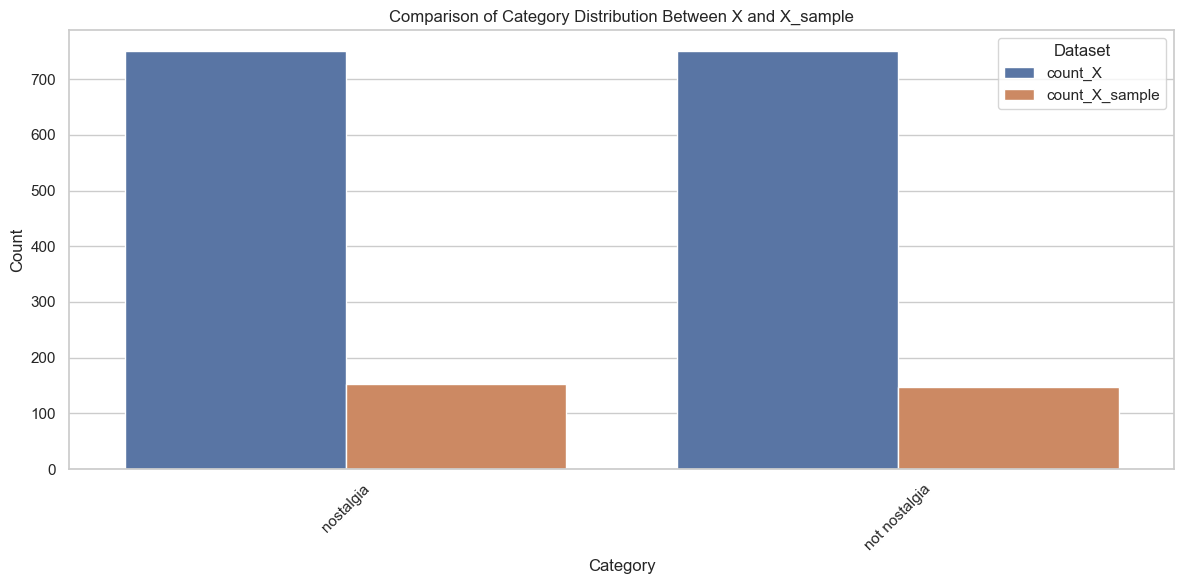

In [11]:
#Ans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_counts = X['sentiment'].value_counts().reset_index()
X_counts.columns = ['sentiment', 'count_X']

X_sample_counts = X_sample['sentiment'].value_counts().reset_index()
X_sample_counts.columns = ['sentiment', 'count_X_sample']
comparison_df = pd.merge(X_counts, X_sample_counts, on='sentiment', how='outer')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
comparison_df_melted = comparison_df.melt(id_vars='sentiment', value_vars=['count_X', 'count_X_sample'], 
                                            var_name='Dataset', value_name='Count')
sns.barplot(x='sentiment', y='Count', hue='Dataset', data=comparison_df_melted)

plt.title('Comparison of Category Distribution Between X and X_sample')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

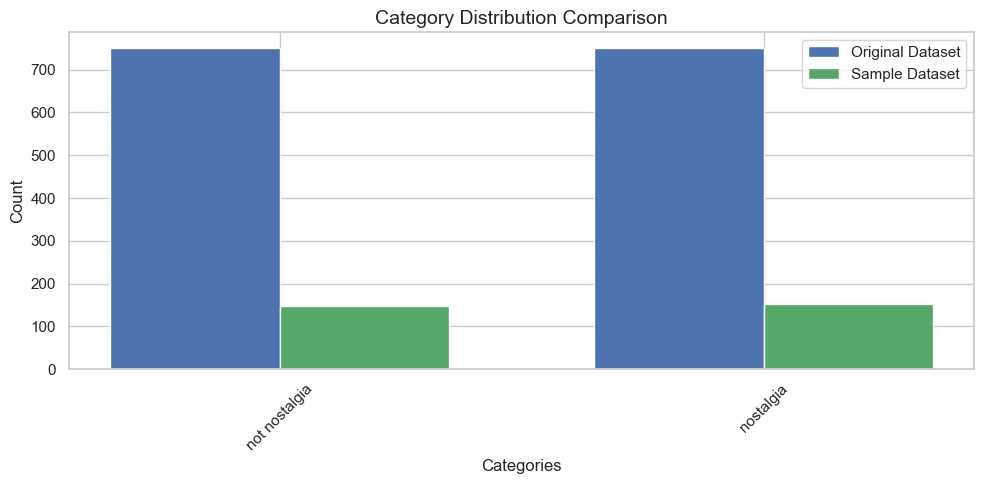

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate category counts for both datasets
original_counts = X.sentiment.value_counts()
sample_counts = X_sample.sentiment.value_counts()

# Step 2: Prepare data for plotting
categories = original_counts.index  # Get the categories from original dataset
original_counts = original_counts.reindex(categories, fill_value=0)  # Ensure all categories are present
sample_counts = sample_counts.reindex(categories, fill_value=0)  # Ensure all categories are present

# Step 3: Create a side-by-side bar chart
bar_width = 0.35  # Width of the bars
x = np.arange(len(categories))  # The label locations

fig, ax = plt.subplots(figsize=(10, 5))  # Create a figure
bars1 = ax.bar(x - bar_width/2, original_counts, bar_width, label='Original Dataset', color='b')
bars2 = ax.bar(x + bar_width/2, sample_counts, bar_width, label='Sample Dataset', color='g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Category Distribution Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.style.use('dark_background')  # Optional: Set the style
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
import nltk
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]
X[0:4]
list(X[0:1]['unigrams'])
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])
analyze = count_vect.build_analyzer()

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [14]:
#Ans
import numpy as np

fif = X_counts[0, 0:100].toarray().flatten()  # 確保將其展平為一維數組
indices_of_ones = np.where(fif == 1)[0]  # [0] 用於獲取索引的第一個維度
print(indices_of_ones)

words = count_vect.get_feature_names_out()
for index in indices_of_ones:
    print(f"Index: {index}, Word: {words[index]}")

result = analyze(X.comment[0])
index_15 = result[15]
index_15

[15]
Index: 15, Word: 16years


'great'

In [15]:
import numpy as np

fifth_record = X_counts[0]
nonzero_indices = np.nonzero(fifth_record.toarray())[1]
words = count_vect.get_feature_names_out()[nonzero_indices]
print(words)
# I don't know which is correct, so I ask ChatGPT for help.

['16years' 'age' 'all' 'although' 'and' 'at' 'but' 'can' 'days'
 'emotional' 'fan' 'feel' 'for' 'golden' 'great' 'have' 'he' 'hear' 'his'
 'in' 'jim' 'life' 'lord' 'love' 'loving' 'many' 'now' 'of' 'reeves'
 'relaxed' 'singer' 'singers' 'still' 'thank' 'that' 'the' 'those' 'time'
 'to' 'voice' 'vouch' 'was' 'we' 'with' 'you']


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

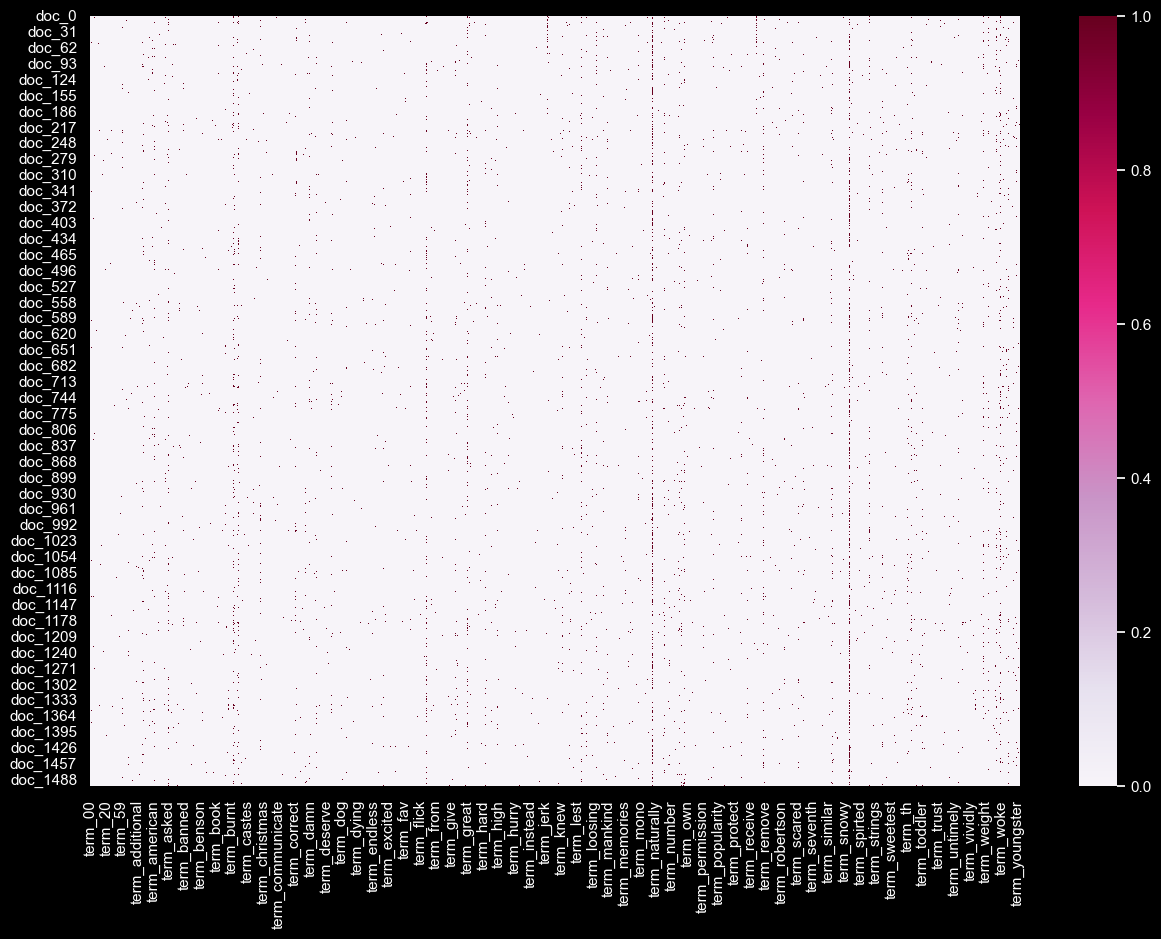

In [16]:
import seaborn as sns
plot_z_full = X_counts.toarray()
plot_x_full = ["term_" + str(i) for i in count_vect.get_feature_names_out()]
plot_y_full = ["doc_" + str(i) for i in range(len(X.index))]

df_full = pd.DataFrame(plot_z_full, columns=plot_x_full, index=plot_y_full)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_full,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False, cbar=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [17]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

1

In [18]:
#Ans
import plotly.express as px
import pandas as pd

words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]
df = pd.DataFrame({'Word': words, 'Frequency': frequencies})

fig = px.bar(df, x='Word', y='Frequency',
             title='Word Frequencies in Articles',
             labels={'Word': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

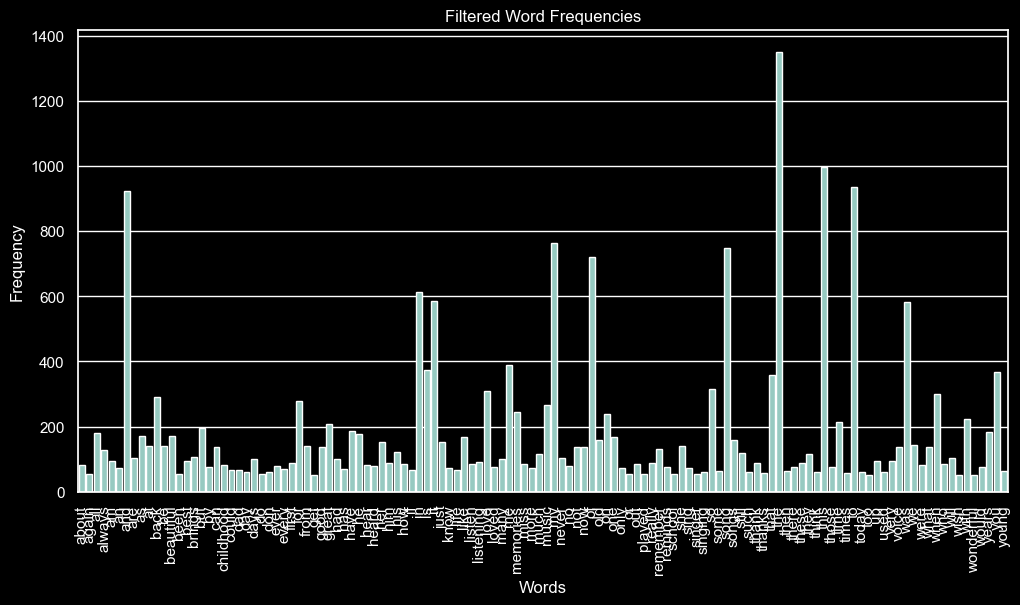

In [19]:
#Ans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

frequency_threshold = 50

filtered_indices = np.where(term_frequencies > frequency_threshold)[0]
filtered_terms = count_vect.get_feature_names_out()[filtered_indices]
filtered_frequencies = term_frequencies[filtered_indices]

plt.subplots(figsize=(12, 6))
sns.barplot(x=filtered_terms, y=filtered_frequencies)
plt.xticks(rotation=90)
plt.title('Filtered Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

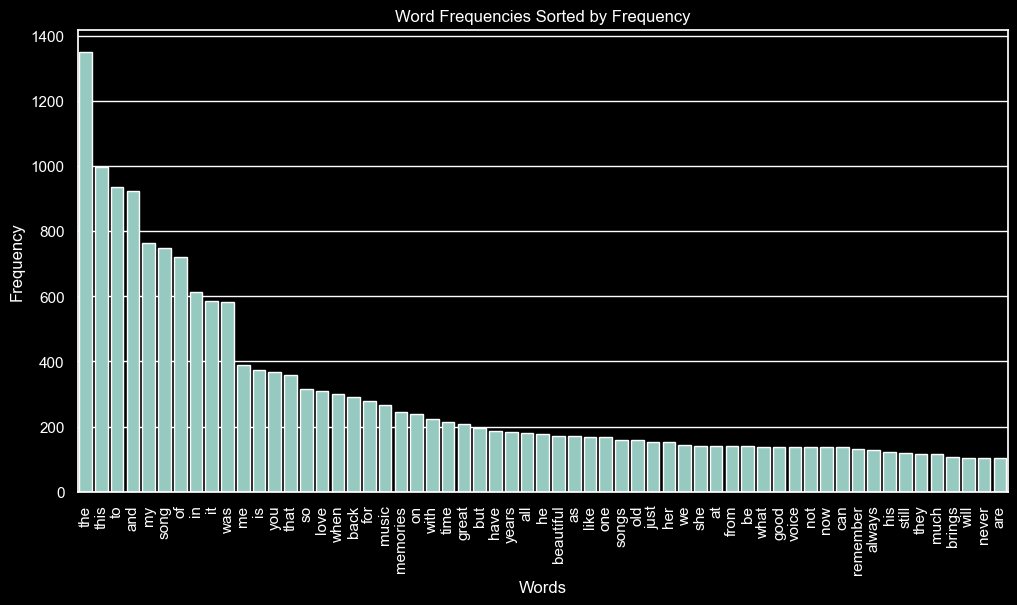

In [20]:
#Ans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

frequency_threshold = 100  # 設定閾值

filtered_indices = np.where(term_frequencies > frequency_threshold)[0]  # 取得頻率大於閾值的詞彙
filtered_terms = count_vect.get_feature_names_out()[filtered_indices]
filtered_frequencies = term_frequencies[filtered_indices]

data = pd.DataFrame({'Terms': filtered_terms, 'Frequencies': filtered_frequencies})  # 將詞彙和頻率組合成DataFrame

data_sorted = data.sort_values(by='Frequencies', ascending=False)  # 按頻率排序

plt.subplots(figsize=(12, 6))
sns.barplot(x='Terms', y='Frequencies', data=data_sorted)
plt.xticks(rotation=90)
plt.title('Word Frequencies Sorted by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

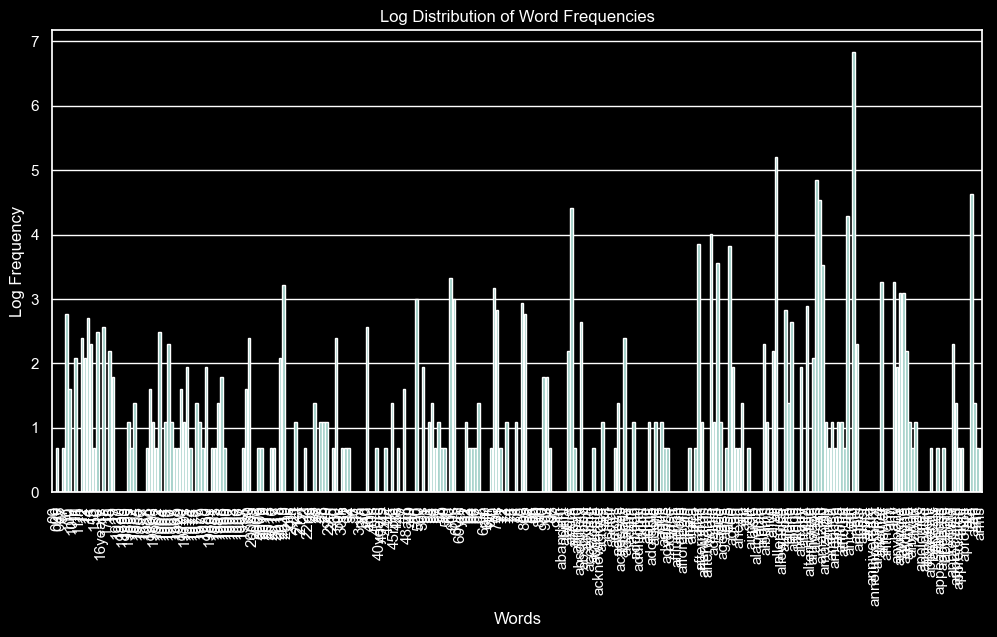

In [21]:
#Ans
import math
import seaborn as sns
import matplotlib.pyplot as plt

term_frequencies_log = [math.log(i) if i > 0 else 0 for i in term_frequencies] # 將詞頻轉換為對數分佈

plt.subplots(figsize=(12, 6))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticks(range(300))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Log Distribution of Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Log Frequency')
plt.show()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category
for category in categories:
    category_dfs[category] = X[X['sentiment'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [23]:
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

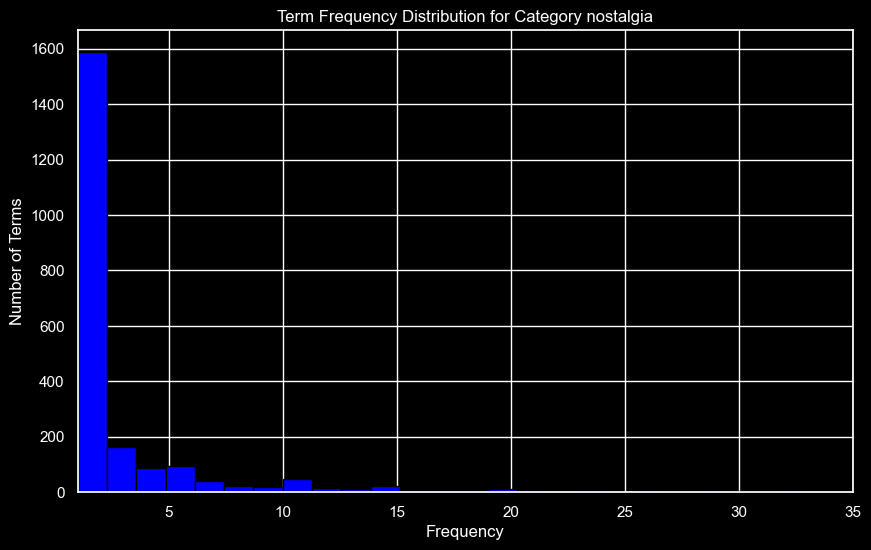

In [24]:
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 35)
plt.show()

In [25]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
top_5_percent_indices = sorted_indices[:top_5_percent_index]
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone', 'melodic', 'mood', 'moon', 'newcomers', 'netherlands', 'nelson', 'needed', 'necessary', 'nearly', 'nearest', 'nash', 'naples', 'nana', 'myanmar', 'moodier', 'musician', 'museum', 'mummy', 'muchm', 'ms', 'mph', 'moved', 'motor', 'motivate', 'mostly', 'mornings', 'moral', 'musically', 'mediterranean', 'media', 'mederios', 'losing', 'loping', 'loops', 'longer', 'lola', 'lock', 'location', 'local', 'lmao', 'lives', 'liverpool', 'loud', 'literally', 'listed', 'lisa', 'linen', 'limitlessly', 'lil', 'lifts', 'lifetime', 'lies', 'lie', 'levis', 'levi', 'listener', 'lover', 'lovey', 'lowest', 'medal', 'measure', 'materialistic', 'matched', 'masterpieces', 

In [26]:
filt_term_document_dfs[categories[category_number]].loc[:,'mostly'].sum(axis=0)

1

In [27]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

In [28]:
#Ans
'''所有類別都過濾掉了底部1%的單詞，這些單詞的出現頻率極低，顯示了它們的非典型性。
各類別的頂部5%單詞包含大量功能詞，這些單詞在任何類別中幾乎都是常見的。'''

'所有類別都過濾掉了底部1%的單詞，這些單詞的出現頻率極低，顯示了它們的非典型性。\n各類別的頂部5%單詞包含大量功能詞，這些單詞在任何類別中幾乎都是常見的。'

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [29]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [40]:
#Ans FAE Top-K
from PAMI.frequentPattern.topk import FAE as alg
import pandas as pd

inputFile = 'td_freq_db_comp_graphics.csv'
seperator = '\t'
kCount = [500, 1000, 1500]  # 要測試的 k 值列表

# 初始化結果 DataFrame 以儲存結果
result = pd.DataFrame(columns=['k_value', 'patterns_count', 'runtime', 'memory_RSS', 'memory_USS'])

# 依序執行每個 k 值的試驗
for k in kCount:
    print(f"Running FAE Top-K with k = {k}...")

    # 初始化 FAE 物件，傳入對應的參數
    obj = alg.FAE(iFile=inputFile, k=k, sep=seperator)  # 這裡應該傳入 k，而不是 kCount
    obj.mine()  # 開始挖掘

    # 儲存結果
    frequentPatternsDF = obj.getPatternsAsDataFrame()
    result.loc[result.shape[0]] = [
        k,  # k 值
        len(frequentPatternsDF),  # 找到的模式數量
        obj.getRuntime(),  # 運行時間
        obj.getMemoryRSS(),  # 使用的 RSS 記憶體
        obj.getMemoryUSS()   # 使用的 USS 記憶體
    ]

    print(f"Total No of patterns: {len(frequentPatternsDF)}")
    print(f"Runtime: {obj.getRuntime()} seconds")
    print(f"Memory (RSS): {obj.getMemoryRSS()} bytes")
    print(f"Memory (USS): {obj.getMemoryUSS()} bytes")
    print('-' * 40)

# 顯示所有結果
print(result)

# 將結果存成 CSV 文件，方便後續分析
result.to_csv('FAE_TopK_Results.csv', index=False)

Running FAE Top-K with k = 500...
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.9566094875335693 seconds
Memory (RSS): 691781632 bytes
Memory (USS): 634167296 bytes
----------------------------------------
Running FAE Top-K with k = 1000...
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 2.1812186241149902 seconds
Memory (RSS): 691781632 bytes
Memory (USS): 634167296 bytes
----------------------------------------
Running FAE Top-K with k = 1500...
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 4.64215874671936 seconds
Memory (RSS): 691785728 bytes
Memory (USS): 634171392 bytes
----------------------------------------
   k_value  patterns_count   runtime   memory_RSS   memory_USS
0    500.0           500.0  0.956609  691781632.0  634167296.0
1   1000.0          1000.0  2.181219  691781632.0  634167296.0

In [53]:
# MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd

inputFile = 'td_freq_db_comp_graphics.csv'
seperator='\t'
minimumSupportCountList = [3, 6, 9]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), 
                                   obj.getRuntime(), obj.getMemoryRSS()]
print(result)
# 儲存結果到 CSV 檔案
result.to_csv('MaxFPGrowth_Results.csv', index=False)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns    runtime     memory
0  MaxFPGrowth       3      6872  29.500585  398811136
1  MaxFPGrowth       6      1340   0.369145  398823424
2  MaxFPGrowth       9       660   0.152309  398823424


<AxesSubplot:xlabel='minSup'>

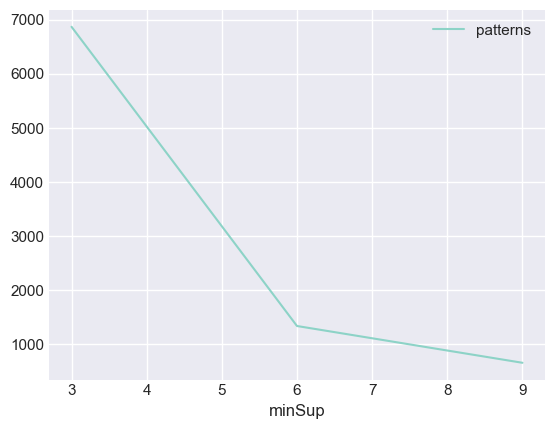

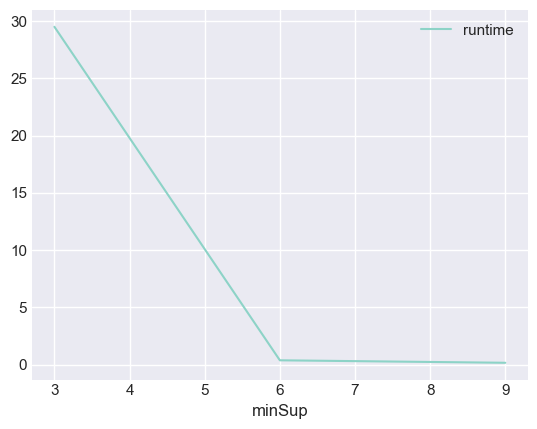

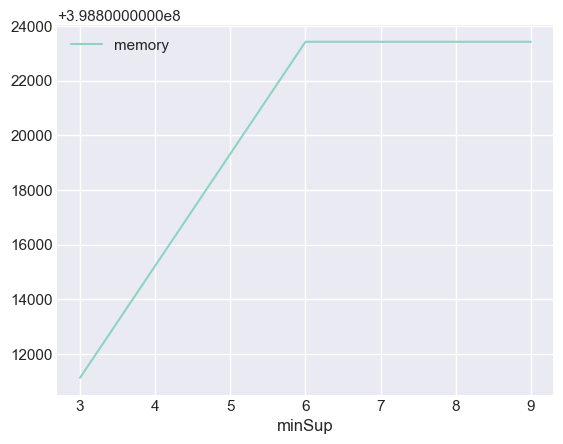

In [54]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### Frequent Pattern Extraction

In [57]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia)))
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime
obj2.save('freq_patterns_nostalgia_minSup9.txt')
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.030920743942260742


Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [58]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.01912546157836914


Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

### Filter Unique Patterns

In [60]:
import pandas as pd

dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


### TDM Pattern Augmentation

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1500 rows x 3950 columns]

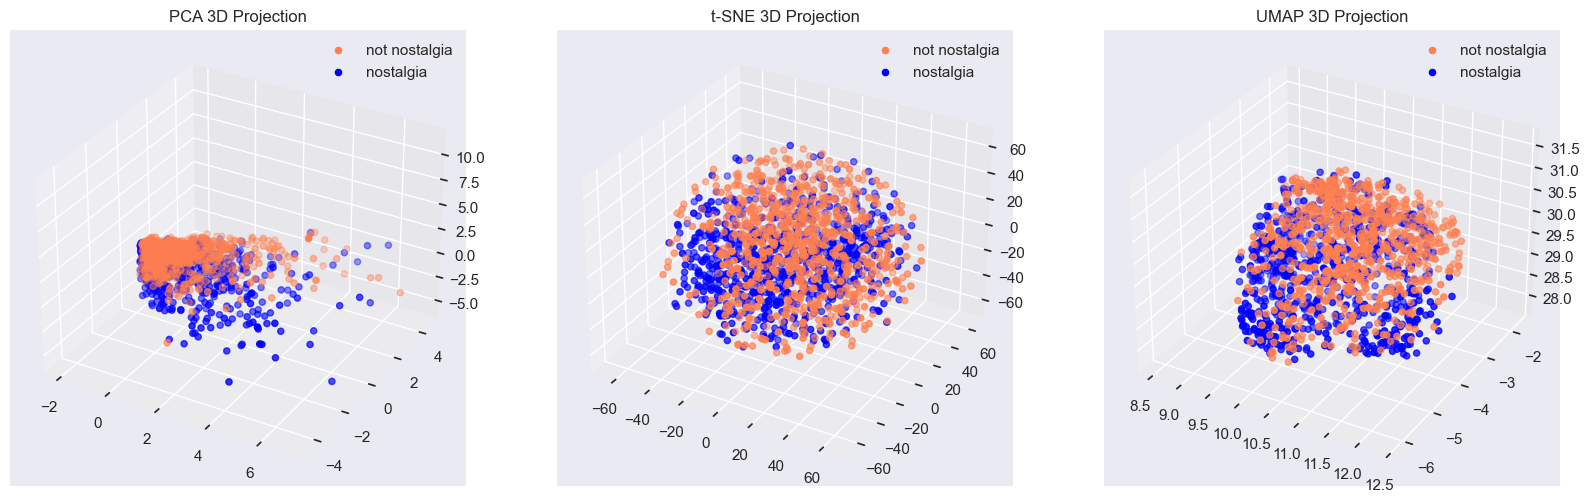

In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('PCA 3D Projection')
for c, category in zip(col, categories):
    xs = X_pca_3d[X['sentiment'] == category][:, 0]
    ys = X_pca_3d[X['sentiment'] == category][:, 1]
    zs = X_pca_3d[X['sentiment'] == category][:, 2]
    ax1.scatter(xs, ys, zs, c=c, label=category)
ax1.legend()

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('t-SNE 3D Projection')
for c, category in zip(col, categories):
    xs = X_tsne_3d[X['sentiment'] == category][:, 0]
    ys = X_tsne_3d[X['sentiment'] == category][:, 1]
    zs = X_tsne_3d[X['sentiment'] == category][:, 2]
    ax2.scatter(xs, ys, zs, c=c, label=category)
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('UMAP 3D Projection')
for c, category in zip(col, categories):
    xs = X_umap_3d[X['sentiment'] == category][:, 0]
    ys = X_umap_3d[X['sentiment'] == category][:, 1]
    zs = X_umap_3d[X['sentiment'] == category][:, 2]
    ax3.scatter(xs, ys, zs, c=c, label=category)
ax3.legend()
plt.show()

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [67]:
#Ans
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X[:9]

comment      sentiment  labels  \
0  He was a singer with a golden voice that I lov...  not nostalgia       0   
1  The mist beautiful voice ever I listened to hi...      nostalgia       1   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia       1   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia       0   
4  listening to his songs reminds me of my mum wh...      nostalgia       1   
5  Every time I heard this song as a child, I use...      nostalgia       1   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia       1   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia       1   
8           Wherever you  are you always in my heart  not nostalgia       0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {feel, many, golden, time., vouch, age, emotio...          [1]  
1  {an, when, him, I, ever, angel, was, forgotten...          [0]  
2  {loving, think, age, I, Reeves, They, my, it, ...          [0]  
3  {Nam, tour, God, when, is, Now,, I, my, came, ...          [1]  
4  {played, everyday, to, him, reminds, my, of, w...          [0]  
5  {many, souls., cry....because, I, it, me, Reev...          [0]  
6  {changes, when, I, 70's, it, loved, things., m...          [0]  
7  {TO, Reeves, I, music., since, me, now, he, LI...          [0]  
8        {always, are, in, my, you, heart, Wherever}          [1]

### It worked